In [1]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.mpe.mpg.de/~jcg/grbgen.html'
r = requests.get(url)
html_contents = r.text
html_soup = BeautifulSoup(html_contents)
dataFound=html_soup.find_all('td')

burstName = []
xRayPosition = []
redshift = []

i=0
burstNumber = 0
while(True):
    bn = dataFound[10+10*i].contents[0].text
    if(len(bn)<6):
        break
    zString = dataFound[19+10*i].contents[0]
    try:
        zFloat = float(zString)
        burstNumber += 1
        burstName.append(bn)
        position = dataFound[11+10*i].text
        xRayPosition.append(position)
        redshift.append(zFloat)
    except:
        pass
    i += 1
print('Number of bursts with a redshift = ',burstNumber)

Number of bursts with a redshift =  468


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


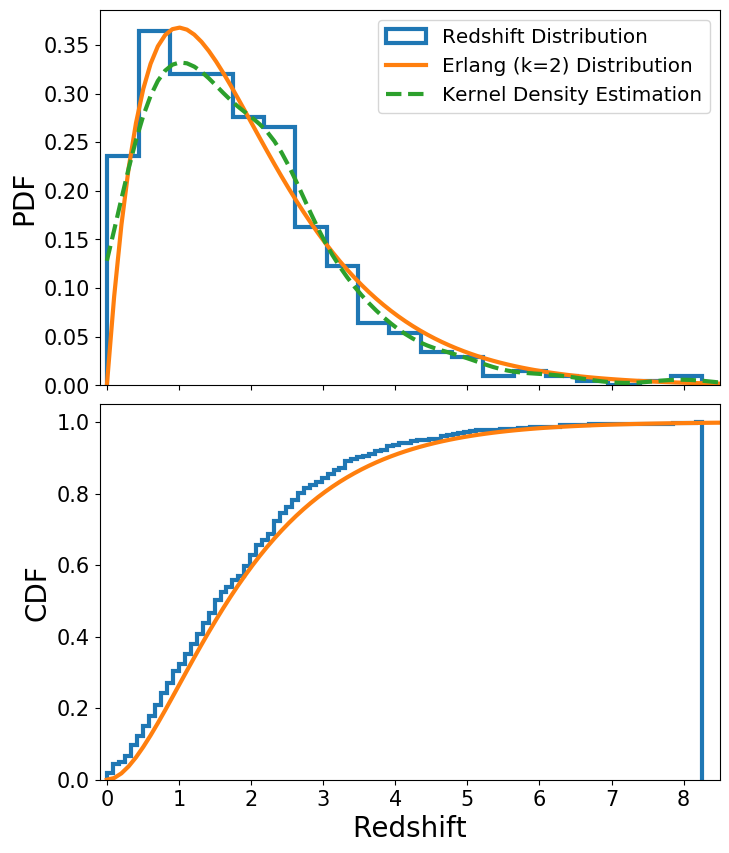

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
#sns.set(style="whitegrid")
%matplotlib inline
mpl.style.use('default')


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes[0].hist(redshift, density=True,histtype='step',linewidth=3.0,
            bins=19, label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             #color="navy",
             label="Erlang (k=2) Distribution")
kde = stats.kde.gaussian_kde(redshift)
axes[0].plot(x, kde(x), linestyle="--",
             linewidth=3.0, label="Kernel Density Estimation")
axes[0].set_xlim([-0.1,8.5])
axes[0].tick_params(labelsize=15)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[2],handles[0],handles[1]],
               [labels[2],labels[0],labels[1]],fontsize='x-large')
axes[0].set_ylabel('PDF',fontsize=20)


axes[1].hist(redshift, cumulative=True,histtype='step',linewidth=3.0,
             rwidth=5.0, density=True, bins=100,
            label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang Distribution (k=2)")
axes[1].tick_params(labelsize=15)
#handles, labels = axes[1].get_legend_handles_labels()
#axes[1].legend([handles[1],handles[0]],
#              [labels[1],labels[0]],fontsize='x-large',loc="lower right")

#fig.text(-0.03, 0.7, 'PDF', ha='center',
#            va='center',rotation='vertical',fontsize=20)
#fig.text(-0.03, 0.3, 'CDF', ha='center',
#            va='center',rotation='vertical',fontsize=20)
#fig.text(0.5, 0.07, "$z$", ha='center',va='center',fontsize=20)
axes[1].set_ylabel('CDF',fontsize=20)
axes[1].set_xlabel('Redshift',fontsize=20)
#plt.xlabel('redshift $z$',fontsize=20)
plt.savefig('./redshift.eps')
#plt.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


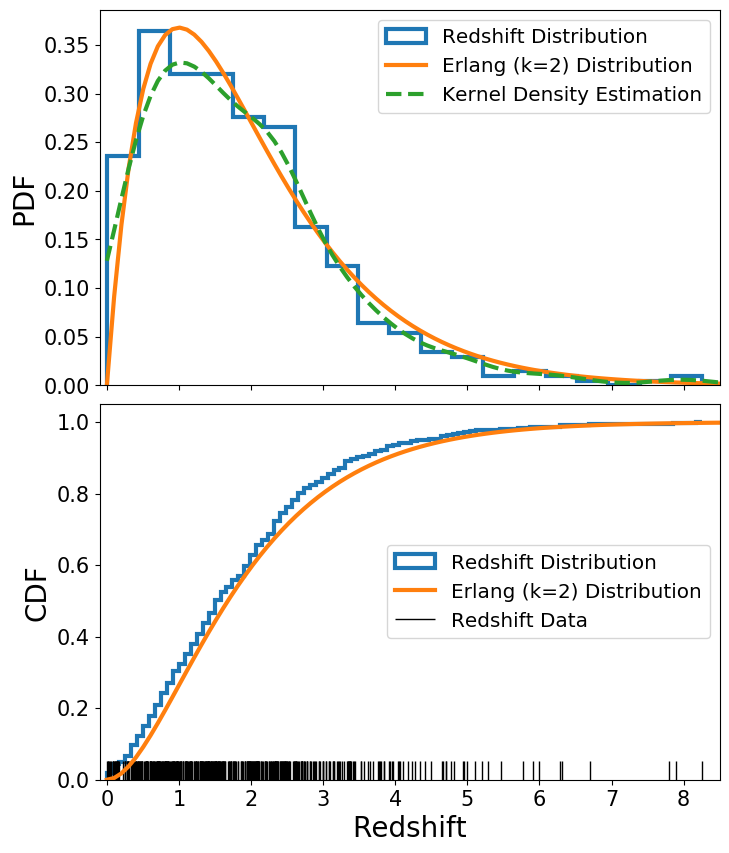

In [22]:
# https://stackoverflow.com/questions/39728723/vertical-line-at-the-end-of-a-cdf-histogram-using-matplotlib
def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])
        
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
#sns.set(style="whitegrid")
%matplotlib inline
mpl.style.use('default')


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes[0].hist(redshift, density=True,histtype='step',linewidth=3.0,
            bins=19, label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             #color="navy",
             label="Erlang (k=2) Distribution")
kde = stats.kde.gaussian_kde(redshift)
axes[0].plot(x, kde(x), linestyle="--",
             linewidth=3.0, label="Kernel Density Estimation")
axes[0].set_xlim([-0.1,8.5])
axes[0].tick_params(labelsize=15)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[2],handles[0],handles[1]],
               [labels[2],labels[0],labels[1]],fontsize='x-large')
axes[0].set_ylabel('PDF',fontsize=20)


axes[1].hist(redshift, cumulative=True,histtype='step',linewidth=3.0,
             rwidth=5.0, density=True, bins=100,
            label="Redshift Distribution")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang (k=2) Distribution")

sns.distplot(redshift,kde=False,hist=False,rug=True,ax=axes[1],rug_kws=dict(label='Redshift Data'),color='black')
axes[1].tick_params(labelsize=15)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend([handles[1],handles[0],handles[2]],
              [labels[1],labels[0],labels[2]],fontsize='x-large',loc="right")

#fig.text(-0.03, 0.7, 'PDF', ha='center',
#            va='center',rotation='vertical',fontsize=20)
#fig.text(-0.03, 0.3, 'CDF', ha='center',
#            va='center',rotation='vertical',fontsize=20)
#fig.text(0.5, 0.07, "$z$", ha='center',va='center',fontsize=20)
axes[1].set_ylabel('CDF',fontsize=20)
axes[1].set_xlabel('Redshift',fontsize=20)
fix_hist_step_vertical_line_at_end(axes[1])
#plt.xlabel('redshift $z$',fontsize=20)
plt.savefig('./redshift_fix.eps')
#plt.close()

(0, 8.5)

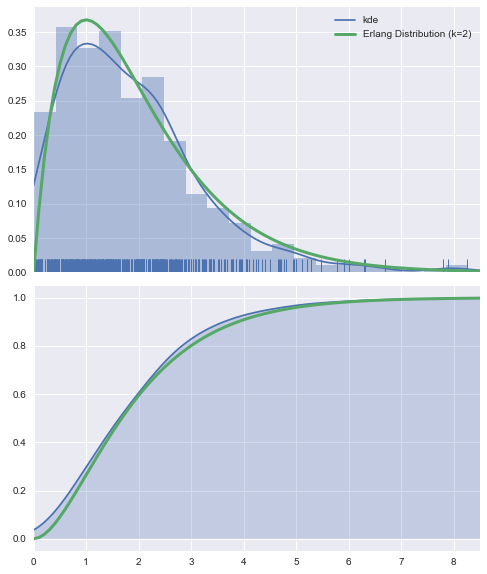

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import seaborn as sns
%matplotlib inline
mpl.style.use('seaborn')


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

sns.distplot(redshift,rug=True,ax=axes[0],kde_kws=dict(label='kde'))
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang Distribution (k=2)")
axes[0].set_xlim([0,8.5])
axes[0].legend()

sns.kdeplot(redshift,shade=True,legend=True,cumulative=True,ax=axes[1])
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang Distribution (k=2)")
axes[1].set_xlim([0,8.5])

In [7]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

In [5]:
stats.kstest(redshift,stats.erlang(2).cdf,mode='asymp')

KstestResult(statistic=0.04821749787181451, pvalue=0.22662763649045634)

In [7]:
stats.kstest(redshift,stats.erlang(2).cdf,mode='asymp',alternative = 'less')

KstestResult(statistic=0.00353160220330917, pvalue=0.9860920419177844)

In [9]:
stats.kstest(redshift,stats.erlang(2).cdf,mode='asymp',alternative = 'greater')

KstestResult(statistic=0.04821749787181451, pvalue=0.10987816627054452)

In [146]:
pValues = []
for diff in np.arange(0.0,1.0,0.01):
    pValue = stats.kstest(np.array(redshift)+diff,stats.erlang(2).cdf,mode='asymp')[1]
    pValues.extend([pValue])

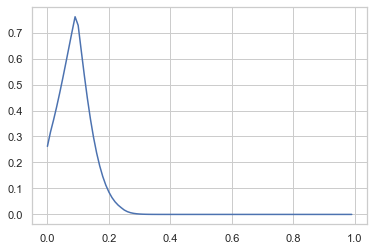

In [148]:
plt.plot(np.arange(0.0,1.0,0.01),pValues)

# Redshift data are under-determined by ~0.1?

In [11]:
stats.kstest(stats.erlang(2).rvs(100),stats.erlang(2).cdf)

KstestResult(statistic=0.07986877786222402, pvalue=0.529980501065859)

(array([ 949.,  986., 1038., 1032.,  988.,  907., 1016., 1035.,  998.,
        1051.]),
 array([4.61731198e-05, 1.00040892e-01, 2.00035611e-01, 3.00030330e-01,
        4.00025049e-01, 5.00019768e-01, 6.00014487e-01, 7.00009206e-01,
        8.00003925e-01, 8.99998645e-01, 9.99993364e-01]),
 <a list of 10 Patch objects>)

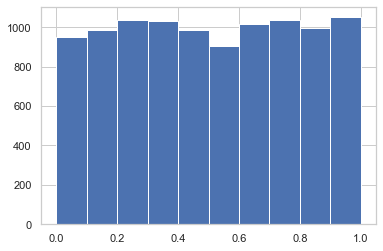

In [12]:
testNumber = 10000
pValues = np.zeros(testNumber)
for i in np.arange(testNumber):
    sample = stats.erlang(2).rvs(len(redshift))
    #plt.hist(sample,density=True)
    pValue = stats.kstest(sample,stats.erlang(2).cdf)[1]
    pValues[i] = pValue
    print(f"i={i}",end="\r")
    #x = np.linspace(0,10,100)
    #Y = stats.erlang(2).pdf(x)
    #plt.plot(x,Y)
plt.hist(pValues)

 0.9821002158655877


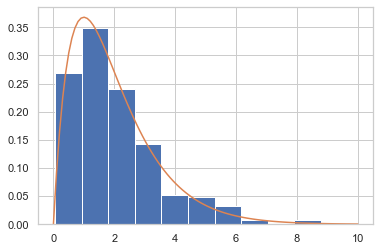

In [63]:
sample = stats.erlang(2).rvs(len(redshift))
plt.hist(sample,density=True)
pValue = stats.kstest(sample,stats.erlang(2).cdf)[1]
#pValues[i] = pValue
print("\r",pValue)
x = np.linspace(0,10,100)
Y = stats.erlang(2).pdf(x)
plt.plot(x,Y)

In [22]:
xRayPosition

["16h00m50s \n+12° 59'",
 "16h19m19s \n-05° 18'",
 "03h38m02s\n-26° 56'",
 "04h22m11s\n+02° 10'",
 "01h59m33s\n+23° 51'",
 "20h09m22s\n-36° 54'",
 "00h55m52s\n-47° 23'",
 "03h30m14s\n-23° 02'",
 "22h09m48s\n+24° 53'",
 "16h54m17s\n-54° 02'",
 "00h02m07s\n-02° 56'",
 "00h26m10s\n-67° 05'",
 "21h12m17s\n-02° 20'",
 "23h50m04s\n-57° 57'",
 "05h11m57s\n-62° 20'",
 "05h34m15s\n-37° 10'",
 "05h31m40s\n-23° 42'",
 "10h29m44s\n+24° 26'",
 "08h27m17s\n+11° 33'",
 "09h53m10s\n+35° 37'",
 "11h09m47s\n-12° 36'",
 "02h37m03s\n+15° 11'",
 "04h26m58s\n-10° 32'",
 "12h47m00s\n-39° 48'",
 "02h17m17s\n+01° 59'",
 "12h46m49s\n+18° 18'",
 "00h29m22s\n+09° 14'",
 "22h50m35s\n-15° 25'",
 "19h07m35s\n-16° 26'",
 "10h53m48s\n+25° 23'",
 "22h00m15s\n+26° 55'",
 "17h05m19s\n-01° 53'",
 "10h10m07s\n+05° 00'",
 "04h06m36s\n-71° 55'",
 "06h06m52s\n-26° 47'",
 "21h04m46s\n+32° 07'",
 "21h28m17s\n-29° 38'",
 "12h03m08s\n+24° 52'",
 "20h44m08s\n-47° 40'",
 "09h31m04s\n+43° 08'",
 "22h10m31s\n+07° 29'",
 "18h39m57s\n+

In [100]:
pattern = r'(\d{2})h(\d{2})m(\d{2})s\s*\n\s*([+-]\d{2})\°\s*(\d{2}.?\d*)\''
for i in range(burstNumber):
    text = xRayPosition[i]
    result = re.search(pattern, text)
    print(result.groups())

('16', '00', '50', '+12', '59')
('16', '19', '19', '-05', '18')
('03', '38', '02', '-26', '56')
('04', '22', '11', '+02', '10')
('01', '59', '33', '+23', '51')
('20', '09', '22', '-36', '54')
('00', '55', '52', '-47', '23')
('03', '30', '14', '-23', '02')
('22', '09', '48', '+24', '53')
('16', '54', '17', '-54', '02')
('00', '02', '07', '-02', '56')
('00', '26', '10', '-67', '05')
('21', '12', '17', '-02', '20')
('23', '50', '04', '-57', '57')
('05', '11', '57', '-62', '20')
('05', '34', '15', '-37', '10')
('05', '31', '40', '-23', '42')
('10', '29', '44', '+24', '26')
('08', '27', '17', '+11', '33')
('09', '53', '10', '+35', '37')
('11', '09', '47', '-12', '36')
('02', '37', '03', '+15', '11')
('04', '26', '58', '-10', '32')
('12', '47', '00', '-39', '48')
('02', '17', '17', '+01', '59')
('12', '46', '49', '+18', '18')
('00', '29', '22', '+09', '14')
('22', '50', '35', '-15', '25')
('19', '07', '35', '-16', '26')
('10', '53', '48', '+25', '23')
('22', '00', '15', '+26', '55')
('17', '

In [101]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
from astropy.coordinates import get_sun, get_moon, SkyCoord
import astropy.units as u
import pandas as pd
import os

467 467


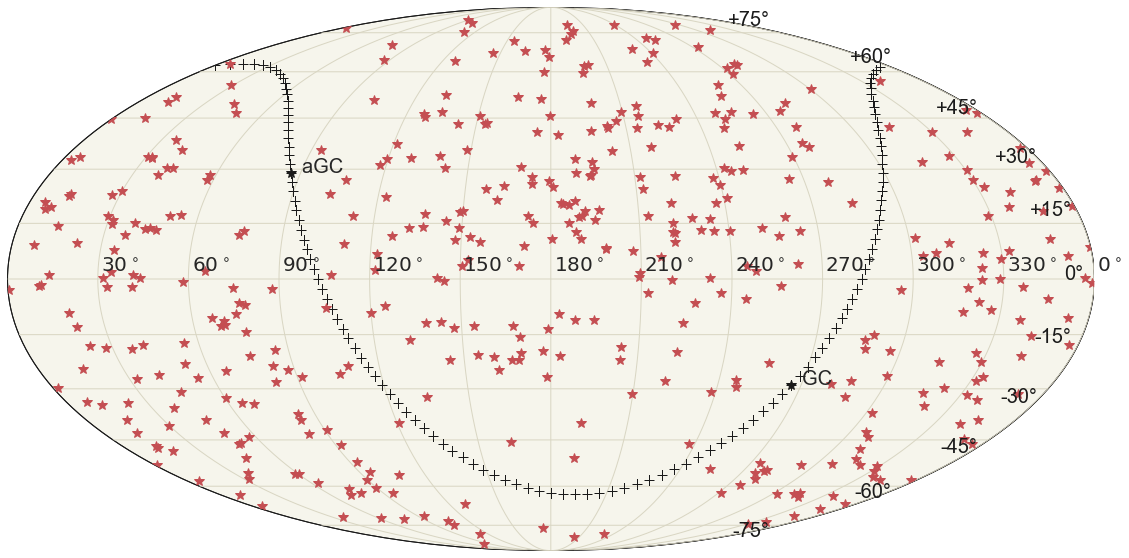

In [130]:
#################################
# Celestial Coordinate (ra,dec) #
#################################
projection = 'moll'
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
map = Basemap(projection=projection,lat_0=0,lon_0=180,
              resolution='l',area_thresh=1000.0,celestial=True,ax=ax)
map.drawmeridians(np.arange(0, 360, 30), dashes=[1,0],color='#d9d6c3')
map.drawparallels(np.arange(-90, 90, 15), dashes=[1,0],labels=[1,0,0,1],
                  color='#d9d6c3',size=20)
map.drawmapboundary(fill_color='#f6f5ec')
if projection == 'moll':
    az1 = np.arange(0, 360, 30)
    zen1 = np.zeros(az1.size) + 2
    azname = []
    for i in az1:
        azname.append(r'${\/%s\/^{\circ}}$' % str(i))
    x1, y1 = map(az1, zen1)
    for index, value in enumerate(az1):
        plt.text(x1[index], y1[index], azname[index], size=20)

galactic_center=SkyCoord("0h 0d", frame='galactic').transform_to('icrs')
x,y=map(galactic_center.ra.deg, galactic_center.dec.deg)
map.plot(x, y, '*', color='k', markersize=10)
plt.text(x, y, '  GC', fontsize=20)

anti_galactic_center=SkyCoord("12h 0d", frame='galactic').transform_to('icrs')
x,y=map(anti_galactic_center.ra.deg, anti_galactic_center.dec.deg)
map.plot(x, y, '*', color='k', markersize=10)
plt.text(x, y, '  aGC', fontsize=20)

for i in np.arange(0, 24, 0.2):
    galactic_plane=SkyCoord(str(i)+"h 0d", frame='galactic').transform_to('icrs')
    x,y=map(galactic_plane.ra.deg, galactic_plane.dec.deg)
    map.plot(x, y, '+', color='k', markersize=10)

catalog_x=[]
catalog_y=[]
pattern = r'(\d{2})h(\d{2})m(\d{2})s\s*\n\s*([+-]\d{2})\°\s*(\d{2}.?\d*)\''
#burstNumber
for i in range(burstNumber):
    text = xRayPosition[i]
    result = re.search(pattern, text)
    ra = "{}h{}m{}s".format(result.groups()[0],
                            result.groups()[1],result.groups()[2])
    if len(result.groups([2]))>2:
        dec = "{}d{}m{}s".format(result.groups()[3],
                             result.groups()[4][:2],str(int(result.groups()[4][-1])*6.0))
    else:
        dec = "{}d{}m{}s".format(result.groups()[3],
                             result.groups()[4],'00')
    mysource = SkyCoord(ra, dec, frame = 'icrs')
    x, y = map(mysource.ra.deg,mysource.dec.deg)
    catalog_x.extend([x])
    catalog_y.extend([y])
print(len(catalog_x),len(catalog_y))
map.plot(catalog_x, catalog_y, color='r',marker='*',markersize=10,ls='None')

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_usersjar():
    usersjar = "/home/lang/Software/HEASARC-Xamin/users.jar"
    return usersjar

def query_veroncat(cdir='./'):
    '''
    veroncat:Veron Catalog of Quasars & AGN, 13th Edition 
    https://heasarc.gsfc.nasa.gov/W3Browse/all/veroncat.html
    
    Redshift_Flag
    This flag is set to 'E' if the redshift was estimated by slitless spectroscopy, 
    and is set to '>' if the quoted redshift is a lower limit.

     Position_Flag
        This flag is related to the accuracy and source for the quoted position:

      O =  optical position with an accuracy better than 1 arcsecond
      R =  radio position with an accuracy better than 1 arcsecond
      A =  approximate position
  
    '''
    veroncat = cdir+'/veroncat.txt'
    if not os.path.exists(fermigbrst):
        usersjar = get_usersjar()
        assert os.path.exists(usersjar), """'users.jar' is not available! 
            download users.jar at:
            https://heasarc.gsfc.nasa.gov/xamin/distrib/users.jar
            and update the path of usersjar in 'personal_settings.py'."""
        java_ready = os.system("java --version")
        assert not java_ready, """java not properly installed!
            Install Oracle Java 10 (JDK 10) in Ubuntu or Linux Mint from PPA
            $ sudo add-apt-repository ppa:linuxuprising/java
            $ sudo apt update
            $ sudo apt install oracle-java10-installer"""
        fields = ("name,redshift_flag,redshift,"
                  "ra,dec,lii,bii,position_flag")
        print('querying veroncat catalog using HEASARC-Xamin-users.jar ...')
        query_ready = os.system("java -jar "+usersjar+" table=veroncat fields="
                +fields+" sortvar=redshift output="+cdir+"/veroncat.txt")
        assert not query_ready, 'failed in querying veroncat catalog!'
        print('successful in querying veroncat catalog!')
    return veroncat

veroncat = query_veroncat()

querying veroncat catalog using HEASARC-Xamin-users.jar ...
successful in querying veroncat catalog!
